<a href="https://colab.research.google.com/github/ashley-ferreira/PHYS449_FinalProject/blob/main/notebooks/Feature_Maps_of_Paper_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook to load the data in google colab:

In [4]:
#Import Modules:
import numpy as np
import torch
import matplotlib.pyplot as plt
import os

#Import google drive (need to put data folder as shortcut in your local drive My Drive):
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#LOAD THE DATA FROM TXT FILE INTO A BATCH:
def data_batch(datafile_index, num_images=10, data_file='/content/drive/MyDrive/Final Project/data/data_g_band.txt'):
    '''
    Description:
        Access datafile.txt, each row is flattened 110x110 image + 1 label string (E, Sp, S0, Irr+Misc).
        Returns an augmented batch of num_images X 40.
        The labels are converted to 1D vectors (ex: Sp = [0,0,1,0])
        Need to give a datafile_index that tells which rows to pick.
    Inputs:
        datafile_index: index of row in datafile to load. loads rows datafile_index to datafile_index+num_images.
        num_images: number of different images to load per batch, total batch size 
        is 40 X num_images. (default: 10 (for 40X10 = 400 batch size like in paper)
        data_file: datafile full path, need to add shortcut to local Drive. (default: '/content/drive/MyDrive/data/data_g_band.txt')
    Outputs:
        tensor_input_batch_aug: dimensions: (100, 100, num_images X 40). 
        tensor_label_batch_aug: dimensions: (num_images X 40, 4)
    '''

    #data_file = 'data_g_band.txt'

    #Take batch of num_images rows from datafile:
    with open(data_file, 'r') as f:
        rows = f.readlines()[datafile_index:(datafile_index+num_images)]

    #for batch size of 400 (augmented), need 10 images
    data_batch = np.zeros((num_images,12101), dtype=np.dtype('U10'))
    count = 0
    for row in rows:
        data_batch[count,:] = row.split()
        count += 1

    #separate label and input:
    input_batch_flat = np.array(data_batch[:,:12100], dtype=int)
    label_batch = np.array(data_batch[:,-1])

    #convert input batch back to a 2D array:
    input_batch = np.empty((110,110,np.shape(input_batch_flat)[0]), dtype=int)
    for ii in range(np.shape(input_batch_flat)[0]):
        input_batch[:,:,ii] = np.reshape(input_batch_flat[ii,:], (110,110))


    #convert label batch into into 1D vector: 
    #E=0, S0=1, Sp=2, Irr+Misc=3
    #ex: label = [0,0,1,0] ==> Sp galagy
    arr_label_batch = np.empty((np.shape(label_batch)[0],4), dtype=int)
    arr_label_batch[:,0] = np.array([label_batch == 'E'], dtype=int)
    arr_label_batch[:,1] = np.array([label_batch == 'Sp'], dtype=int)
    arr_label_batch[:,2] = np.array([label_batch == 'S0'], dtype=int)
    arr_label_batch[:,3] = np.array([label_batch == 'Irr+Misc'], dtype=int)

    #test with image plotted
    #import matplotlib.pyplot as plt
    #plt.imshow(input_batch[:,:,0])
    #plt.show()

    #NOW AUGMENT THE BATCH (40X more):
    input_batch_aug = np.empty((100,100,np.shape(input_batch)[2]*40), dtype=int)
    arr_label_batch_aug = np.empty((np.shape(arr_label_batch)[0]*40, 4), dtype=int)

    count = 0
    for ll in range(np.shape(input_batch)[2]):
        #Crop 5X more image (100X100 pixels)
        C1 = input_batch[:100,:100,ll]
        C2 = input_batch[10:,:100,ll]
        C3 = input_batch[:100,10:,ll]
        C4 = input_batch[10:,10:,ll]
        C5 = input_batch[5:105,5:105,ll]

        C = [C1, C2, C3, C4, C5]

        for kk in range(5):
            #Rotate 4X more image (by 90 deg)
            for jj in range(4):
                C_R = np.rot90(C[kk], k=jj)
                input_batch_aug[:,:,count] = C_R
                arr_label_batch_aug[count,:] = arr_label_batch[ll,:]
                count += 1
                
                input_batch_aug[:,:,count] = np.swapaxes(C_R,0,1)
                arr_label_batch_aug[count,:] = arr_label_batch[ll,:]
                count += 1


    #PUT THE DATA AS A PYTORCH TENSOR:
    tensor_input_batch_aug = torch.Tensor(input_batch_aug)
    tensor_label_batch_aug = torch.Tensor(arr_label_batch_aug)
    
    return tensor_input_batch_aug, tensor_label_batch_aug


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
0


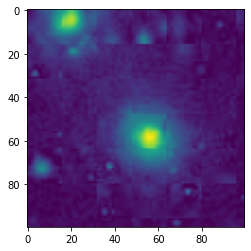

1


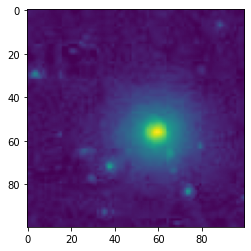

2


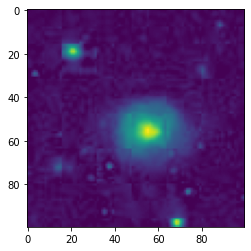

3


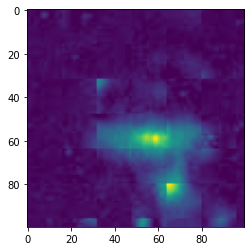

4


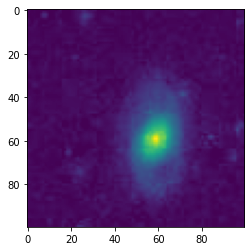

5


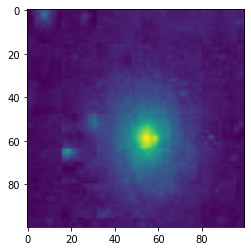

6


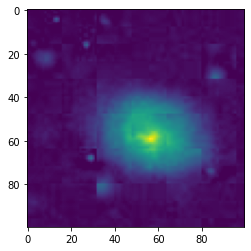

7


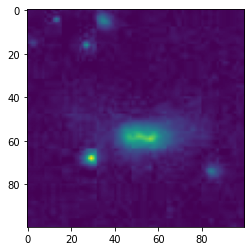

8


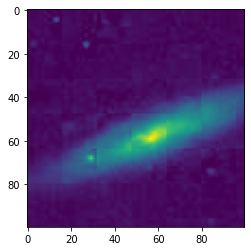

9


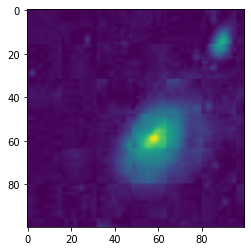

10


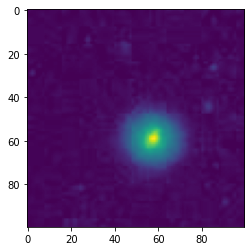

11


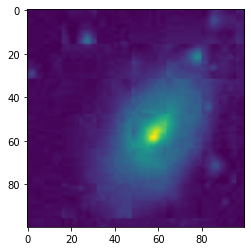

12


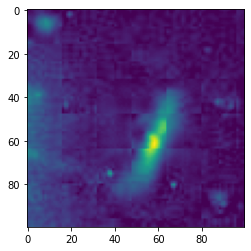

13


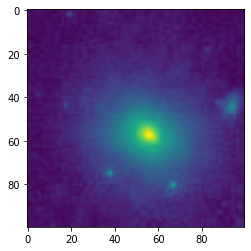

14


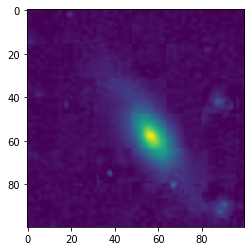

15


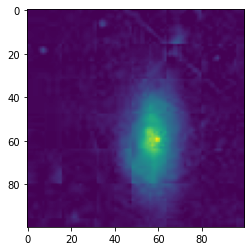

16


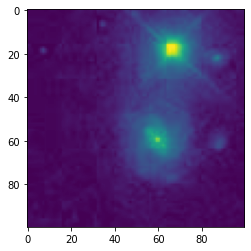

17


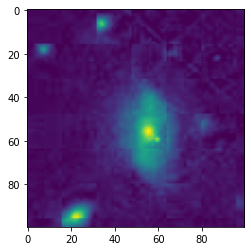

18


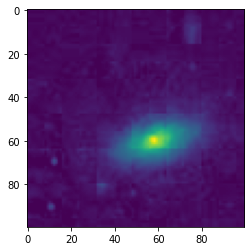

19


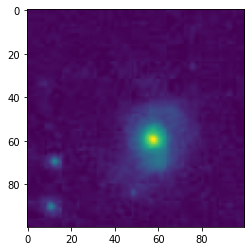

20


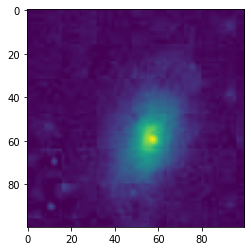

21


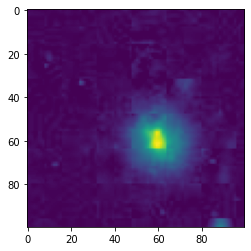

22


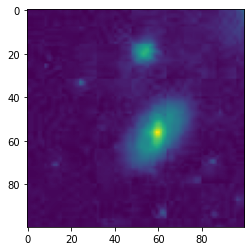

23


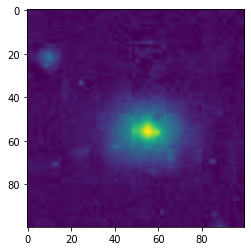

24


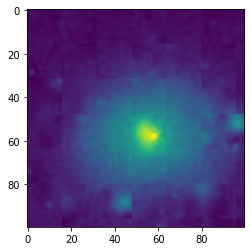

25


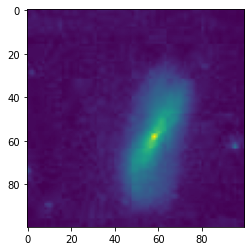

26


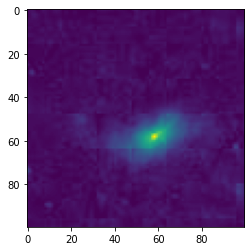

27


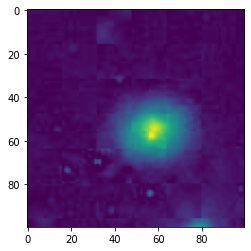

28


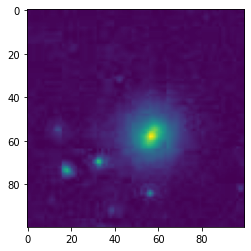

29


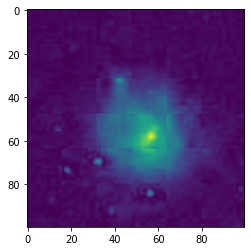

30


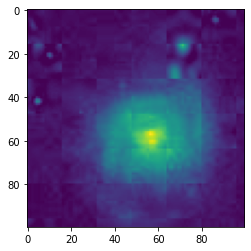

31


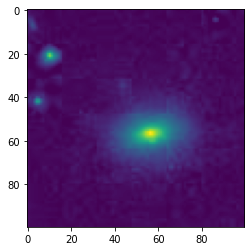

32


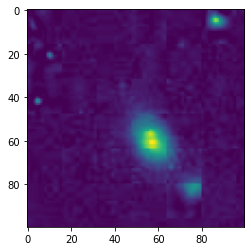

33


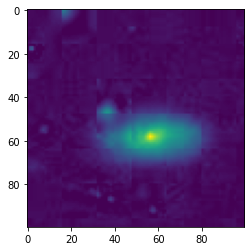

34


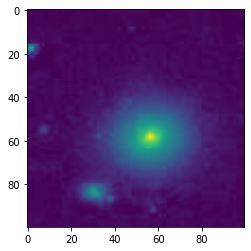

35


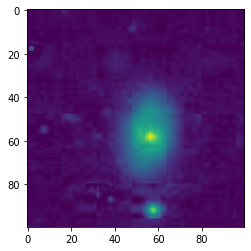

36


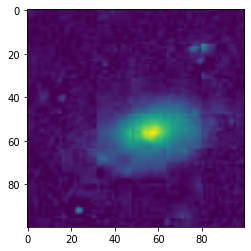

37


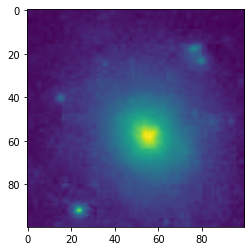

38


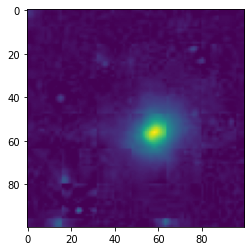

39


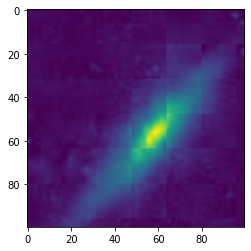

40


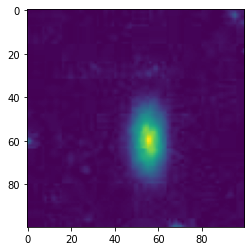

41


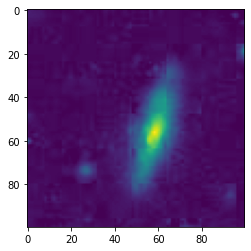

42


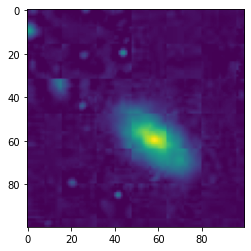

43


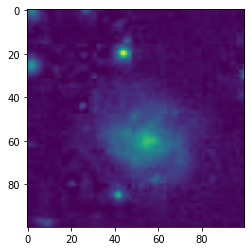

44


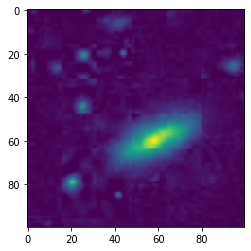

45


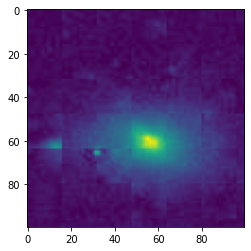

46


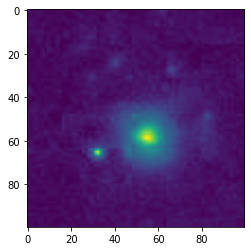

47


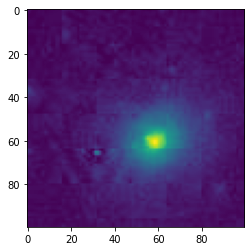

48


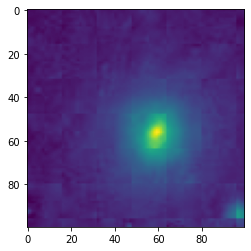

49


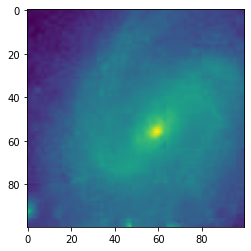

In [44]:
#Train and test set:
#rand_index = np.random.permutation(10)
#print(rand_index)
rand_index = np.arange(0,50,1)
#print(rand_index)
rand_train = rand_index[:]
#print(rand_train)

#Use this loop for training over entire dataset at each epochs
for ii in range(np.shape(rand_train)[0]):
  image_batch, label_batch = data_batch(datafile_index=rand_train[ii], num_images=50)
  print(rand_train[ii])
  plt.grid  ( False )
  plt.imshow( image_batch[:,:,0], aspect=1, cmap='viridis' )
  plt.show()

#image_batch, label_batch = data_batch(datafile_index=[10], num_images=1)

#print(image_batch[:,:,0])



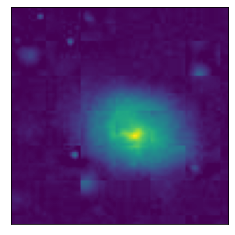

In [75]:
image_batch, label_batch = data_batch(datafile_index=6, num_images=1)
plt.grid  ( False )
plt.imshow( image_batch[:,:,0], aspect=1, cmap='viridis' )
plt.xticks([])
plt.yticks([])
plt.show()

In [46]:
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Flatten, Conv2D, MaxPool2D
from keras.layers.core import Dropout
import os

In [63]:
import tensorflow as tf
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import transforms as T
from torch.utils.data import Dataset, DataLoader
#import wandb

#DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")

# connect to w&b for experiment tracking
#wandb.init(project="CNN-4way-C1-subset", entity="449-final project")

In [49]:
num_classes = 4

In [50]:
# need to double check but this is roughly right
networkc1 = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, stride=1, padding=0),
    nn.ReLU(),
    nn.BatchNorm2d(32),
    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=0),
    nn.ReLU(),
    nn.BatchNorm2d(64),
    # max pool here
    nn.MaxPool2d(kernel_size=2),
    nn.Flatten(),
    #nn.Linear(135424, 256), 
    # dropout here
    nn.Dropout(0.5),
    nn.ReLU(), # do we need an activation function here?
    nn.Linear(135424,256),
    nn.ReLU(),
    nn.Linear(256, num_classes))

In [52]:
networkc1

Sequential(
  (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Flatten(start_dim=1, end_dim=-1)
  (8): Dropout(p=0.5, inplace=False)
  (9): ReLU()
  (10): Linear(in_features=135424, out_features=256, bias=True)
  (11): ReLU()
  (12): Linear(in_features=256, out_features=4, bias=True)
)

In [77]:
modelc1 = Sequential()
modelc1.add(Conv2D(32, kernel_size=(5, 5), input_shape=(100,100,1), activation='relu', padding='same'))
modelc1.add(BatchNormalization())
#modelc1.add(MaxPool2D(pool_size=(2, 2)))
modelc1.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
#modelc1.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
modelc1.add(BatchNormalization())
modelc1.add(MaxPool2D(pool_size=(2, 2)))
#modelc1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
#modelc1.add(BatchNormalization())
#modelc1.add(MaxPool2D(pool_size=(2, 2)))
modelc1.add(Flatten())
modelc1.add(Dropout(0.5))
modelc1.add(Dense(256, activation='relu'))
modelc1.add(Dense(256, activation='relu'))
modelc1.add(Dense(10, activation='softmax'))
modelc1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 100, 100, 32)      832       
                                                                 
 batch_normalization_7 (Batc  (None, 100, 100, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 100, 100, 64)      51264     
                                                                 
 batch_normalization_8 (Batc  (None, 100, 100, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                      

In [54]:
networkc2 = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=32, kernel_size=7, stride=1, padding=0),
    nn.ReLU(),
    nn.BatchNorm2d(32),
    nn.MaxPool2d(kernel_size=2),

    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=0),
    nn.ReLU(),
    nn.BatchNorm2d(64),

    nn.Conv2d(in_channels=64, out_channels=64, kernel_size=5, stride=1, padding=0),
    nn.ReLU(),
    nn.BatchNorm2d(64),
    nn.MaxPool2d(kernel_size=2),

    nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=0),
    nn.ReLU(),
    nn.BatchNorm2d(128),
    nn.MaxPool2d(kernel_size=2),

    nn.Flatten(),
    nn.Linear(8192, 256),
    nn.Dropout(0.5),

    nn.ReLU(),
    nn.Linear(256,256),
    nn.ReLU(),
    nn.Linear(256, num_classes))

In [55]:
networkc2

Sequential(
  (0): Conv2d(1, 32, kernel_size=(7, 7), stride=(1, 1))
  (1): ReLU()
  (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (5): ReLU()
  (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1))
  (8): ReLU()
  (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (11): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (12): ReLU()
  (13): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_features=8192, out_features=256, bias=True)
 

In [69]:
modelc2 = Sequential()
modelc2.add(Conv2D(32, kernel_size=(7, 7), input_shape=(100,100,1), activation='relu', padding='same'))
modelc2.add(BatchNormalization())
modelc2.add(MaxPool2D(pool_size=(2, 2)))
modelc2.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
modelc2.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
modelc2.add(BatchNormalization())
modelc2.add(MaxPool2D(pool_size=(2, 2)))
modelc2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
modelc2.add(BatchNormalization())
modelc2.add(MaxPool2D(pool_size=(2, 2)))
modelc2.add(Flatten())
modelc2.add(Dropout(0.5))
modelc2.add(Dense(256, activation='relu'))
modelc2.add(Dense(256, activation='relu'))
modelc2.add(Dense(10, activation='softmax'))
modelc2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 100, 100, 32)      1600      
                                                                 
 batch_normalization_4 (Batc  (None, 100, 100, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 50, 50, 64)        51264     
                                                                 
 conv2d_7 (Conv2D)           (None, 50, 50, 64)        102464    
                                                                 
 batch_normalization_5 (Batc  (None, 50, 50, 64)      

In [70]:
layer_names = [layer.name for layer in modelc2.layers]
layer_names

['conv2d_5',
 'batch_normalization_4',
 'max_pooling2d_3',
 'conv2d_6',
 'conv2d_7',
 'batch_normalization_5',
 'max_pooling2d_4',
 'conv2d_8',
 'batch_normalization_6',
 'max_pooling2d_5',
 'flatten_1',
 'dropout_1',
 'dense_3',
 'dense_4',
 'dense_5']

In [71]:
successive_outputs = [layer.output for layer in modelc2.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = modelc2.input, outputs = successive_outputs)

x = image_batch[:,:,0].detach().cpu().numpy()#images[111]                 # Numpy array with shape (150, 150, 3)
print(x.shape)
print(type(x))
x = x.reshape((1,) + x.shape)   # Numpy array with shape (1, 150, 150, 3)

# Rescale the image by 1/255
x /= 255.0

# We run the image through the NN and get all the intermediate representations for the image
successive_feature_maps = visualization_model.predict(x)

# Getting the names of the layers to call upon later
layer_names = [layer.name for layer in modelc2.layers]

(100, 100)
<class 'numpy.ndarray'>
1/1 [==============================] - 0s 345ms/step


(1, 100, 100, 32)
conv2d_5
32 0 0 0


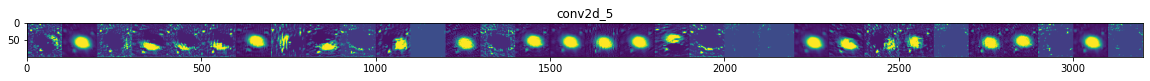

(1, 50, 50, 32)
(1, 50, 50, 64)
(1, 50, 50, 64)
conv2d_6
32 64 0 0


<ipython-input-72-4e45012022cf>:22: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()


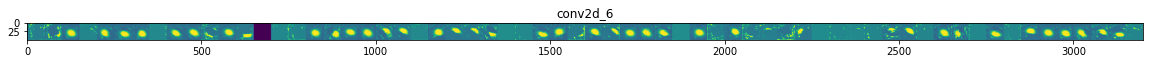

(1, 50, 50, 64)
conv2d_7
32 64 64 0


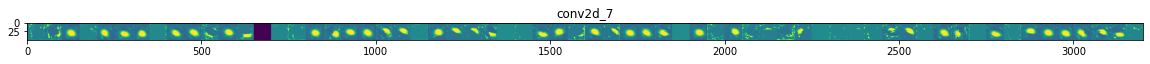

(1, 25, 25, 64)
(1, 25, 25, 128)
(1, 25, 25, 128)
conv2d_8
32 64 64 128


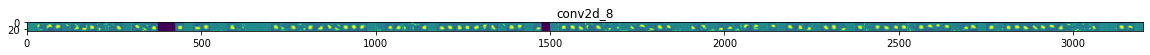

(1, 12, 12, 128)
(1, 18432)
(1, 18432)
(1, 256)
(1, 256)
(1, 10)


In [72]:
#Saving the names of the lists of the images 
conv2d_list = []
conv2d1_list = []
conv2d2_list = []
conv2d3_list = []
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    print(feature_map.shape)
    if len(feature_map.shape) == 4 and ('conv2d' in layer_name):
        # We just want the maps for the conv layers, not the maxpool or fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in the feature map
        #print(n_features)
        size = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

        # The images will be tiled in this matrix
        display_grid = np.zeros((size, size * n_features))

        # Altering the feature maps to be more visually understandable
        print(layer_name)
        for i in range(n_features):
            x  = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std ()
            x *=  64
            x += 128
            x  = np.clip(x, 0, 255).astype('uint8') #Saves the individual image
            display_grid[:, i * size : (i + 1) * size] = x # Combine all the maps into a long horizontal image
            #Saving the individual maps by layer
            if (layer_name == 'conv2d_5'):
                conv2d_list.append(x) #Takes the individual maps for the layer
                split = np.array(np.hsplit(display_grid, 4))
                conv2d_grid = np.array(np.vstack(split)) #Rearranges the images to desired grid shape
            if (layer_name == 'conv2d_6'):
                conv2d1_list.append(x)
                split = np.array(np.hsplit(display_grid, 4))
                conv2d1_grid = np.array(np.vstack(split))
            if (layer_name == 'conv2d_7'):
                conv2d2_list.append(x)
                split = np.array(np.hsplit(display_grid, 4))
                conv2d2_grid = np.array(np.vstack(split))
            if (layer_name == 'conv2d_8'):
                conv2d3_list.append(x)
                split = np.array(np.hsplit(display_grid, 8))
                conv2d3_grid = np.array(np.vstack(split))            

        # Display all the convolutional grid feature maps
        print(len(conv2d_list),len(conv2d1_list),len(conv2d2_list),len(conv2d3_list))
        scale = 20. / n_features
        plt.figure( figsize=(scale * n_features, scale) )
        plt.title ( layer_name )
        plt.grid  ( False )
        plt.imshow( display_grid, aspect='auto', cmap='viridis' )
        plt.show()
        #plt.imshow( x, aspect='auto', cmap='viridis' )
        #plt.show()
        #plt.imshow( x, aspect=1, cmap='viridis' )

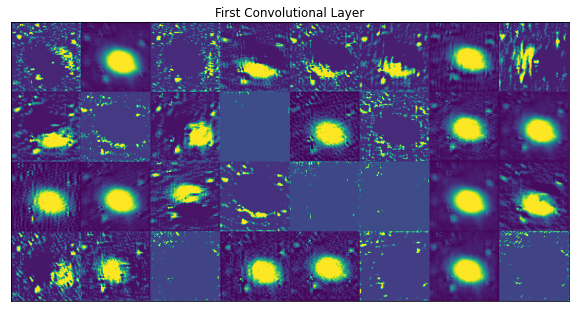

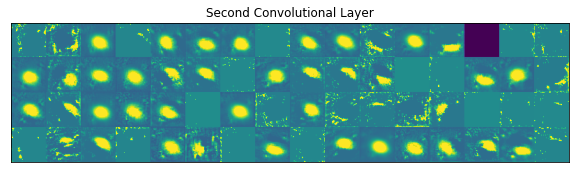

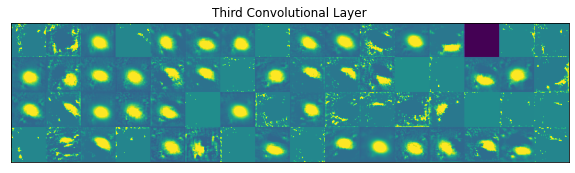

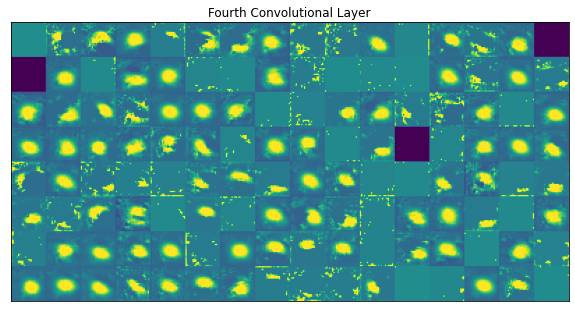

In [73]:
plt.figure(figsize=(10, 10))
plt.title('First Convolutional Layer')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(conv2d_grid, aspect=1, cmap='viridis')
plt.show()
plt.figure(figsize=(10, 10))
plt.title('Second Convolutional Layer')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(conv2d1_grid, aspect=1, cmap='viridis')
plt.show()
plt.figure(figsize=(10, 10))
plt.title('Third Convolutional Layer')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(conv2d2_grid, aspect=1, cmap='viridis')
plt.show()
plt.figure(figsize=(10, 10))
plt.title('Fourth Convolutional Layer')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(conv2d3_grid, aspect=1, cmap='viridis')
plt.show()

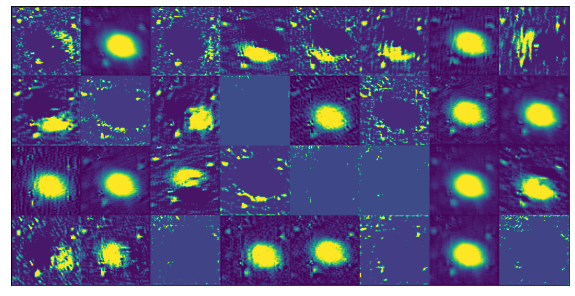

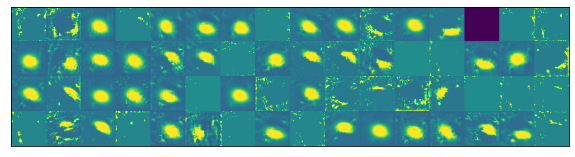

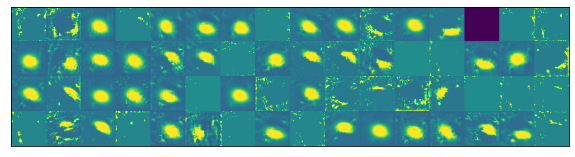

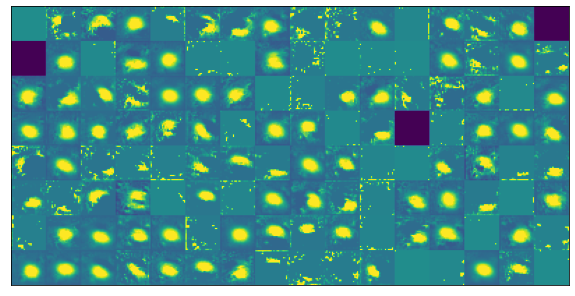

In [76]:
plt.figure(figsize=(10, 10))
#plt.title('First Convolutional Layer')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(conv2d_grid, aspect=1, cmap='viridis')
plt.show()
plt.figure(figsize=(10, 10))
#plt.title('Second Convolutional Layer')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(conv2d1_grid, aspect=1, cmap='viridis')
plt.show()
plt.figure(figsize=(10, 10))
#plt.title('Third Convolutional Layer')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(conv2d2_grid, aspect=1, cmap='viridis')
plt.show()
plt.figure(figsize=(10, 10))
#plt.title('Fourth Convolutional Layer')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(conv2d3_grid, aspect=1, cmap='viridis')
plt.show()

In [78]:
successive_outputs = [layer.output for layer in modelc1.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = modelc1.input, outputs = successive_outputs)

x = image_batch[:,:,0].detach().cpu().numpy()#images[111]                 # Numpy array with shape (150, 150, 3)
print(x.shape)
print(type(x))
x = x.reshape((1,) + x.shape)   # Numpy array with shape (1, 150, 150, 3)

# Rescale the image by 1/255
x /= 255.0

# We run the image through the NN and get all the intermediate representations for the image
successive_feature_maps = visualization_model.predict(x)

# Getting the names of the layers to call upon later
layer_names = [layer.name for layer in modelc1.layers]

(100, 100)
<class 'numpy.ndarray'>
1/1 [==============================] - 0s 184ms/step


(1, 100, 100, 32)
conv2d_9
32 0


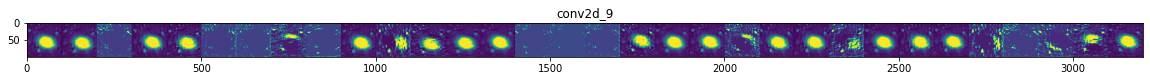

(1, 100, 100, 64)
(1, 100, 100, 64)
conv2d_10
32 64


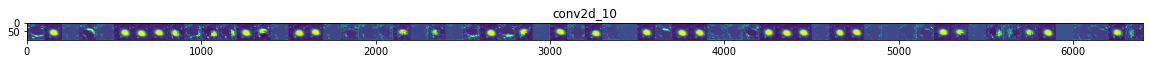

(1, 50, 50, 64)
(1, 160000)
(1, 160000)
(1, 256)
(1, 256)
(1, 10)


In [79]:
#Saving the names of the lists of the images 
conv2d_list = []
conv2d1_list = []
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    print(feature_map.shape)
    if len(feature_map.shape) == 4 and ('conv2d' in layer_name):
        # We just want the maps for the conv layers, not the maxpool or fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in the feature map
        #print(n_features)
        size = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

        # The images will be tiled in this matrix
        display_grid = np.zeros((size, size * n_features))

        # Altering the feature maps to be more visually understandable
        print(layer_name)
        for i in range(n_features):
            x  = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std ()
            x *=  64
            x += 128
            x  = np.clip(x, 0, 255).astype('uint8') #Saves the individual image
            display_grid[:, i * size : (i + 1) * size] = x # Combine all the maps into a long horizontal image
            #Saving the individual maps by layer
            if (layer_name == 'conv2d_9'):
                conv2d_list.append(x) #Takes the individual maps for the layer
                split = np.array(np.hsplit(display_grid, 4))
                conv2d_grid = np.array(np.vstack(split)) #Rearranges the images to desired grid shape
            if (layer_name == 'conv2d_10'):
                conv2d1_list.append(x)
                split = np.array(np.hsplit(display_grid, 4))
                conv2d1_grid = np.array(np.vstack(split))
         

        # Display all the convolutional grid feature maps
        print(len(conv2d_list),len(conv2d1_list))
        scale = 20. / n_features
        plt.figure( figsize=(scale * n_features, scale) )
        plt.title ( layer_name )
        plt.grid  ( False )
        plt.imshow( display_grid, aspect='auto', cmap='viridis' )
        plt.show()
        #plt.imshow( x, aspect='auto', cmap='viridis' )
        #plt.show()
        #plt.imshow( x, aspect=1, cmap='viridis' )

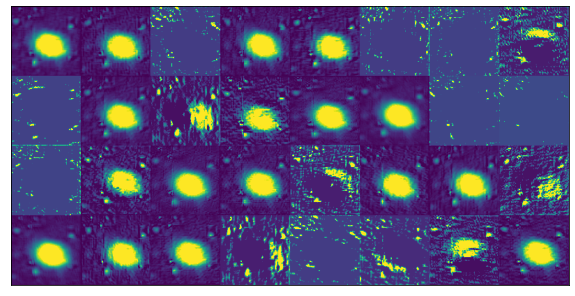

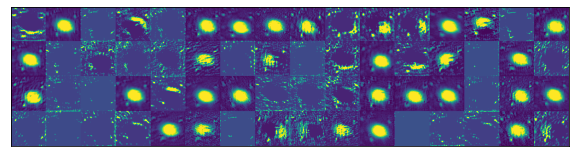

In [80]:
plt.figure(figsize=(10, 10))
#plt.title('First Convolutional Layer')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(conv2d_grid, aspect=1, cmap='viridis')
plt.show()
plt.figure(figsize=(10, 10))
#plt.title('Second Convolutional Layer')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(conv2d1_grid, aspect=1, cmap='viridis')
plt.show()